## importing Data Set

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/imdb_top_2000_movies.csv')

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their count
print("Missing values per column:")
print(missing_values[missing_values > 0])

# Alternatively, show rows with any missing values
missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(missing_rows)


Missing values per column:
Metascore    81
Gross        97
dtype: int64

Rows with missing values:
                   Movie Name Release Year  Duration  IMDB Rating  Metascore  \
4                  Straw Dogs         1971       113          7.4       73.0   
8             Rosemary's Baby         1968       137          8.0       96.0   
16              Roman Holiday         1953       118          8.0       78.0   
17                       Rope         1948        80          7.9       73.0   
28             Fahrenheit 451         1966       112          7.2        NaN   
...                       ...          ...       ...          ...        ...   
1943              Unthinkable         2010        97          7.0        NaN   
1946  Rise of the Footsoldier         2007       119          6.8        NaN   
1951               Wild Child         2008        98          6.1        NaN   
1981            St. Trinian's         2007       101          5.8       39.0   
1987             Solo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

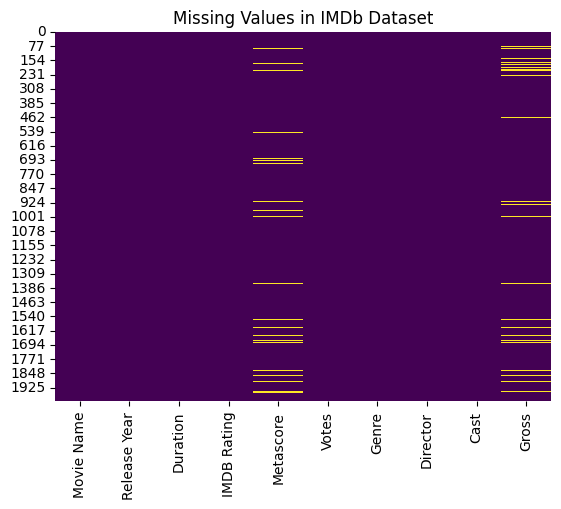

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in IMDb Dataset")
plt.show()


In [ ]:
df.head()

In [ ]:
df

## USING KNN FOR MISSING VALUES

In [6]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assume `df` is your IMDb DataFrame with missing values in 'Metascore'

# Select columns that could help predict 'Metascore'
# (you may adjust this selection based on available columns)
columns_for_imputation = [ 'IMDB Rating', 'Votes', 'Metascore']

# Convert any non-numeric columns if needed (e.g., remove commas from Votes)
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed = df.copy()
#df_imputed[columns_for_imputation] = imputer.fit_transform(df[columns_for_imputation])
df_imputed[columns_for_imputation] = imputer.fit_transform(df[columns_for_imputation])

# Display the result
print(df_imputed[['Movie Name', 'Metascore']])


                 Movie Name  Metascore
0             The Godfather      100.0
1     The Godfather Part II       90.0
2           Ordinary People       86.0
3        Lawrence of Arabia      100.0
4                Straw Dogs       73.0
...                     ...        ...
1995     The Young Victoria       64.0
1996            Tooth Fairy       36.0
1997         The Informant!       66.0
1998        Youth in Revolt       63.0
1999             Quarantine       53.0

[2000 rows x 2 columns]


print(df_imputed['Gross'])

In [7]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assume `df_imputed` is your IMDb DataFrame with missing values in 'Metascore'

# Clean the 'Votes' column if it contains commas
#df_imputed['Votes'] = df_imputed['Votes'].str.replace(',', '').astype(float)

# Clean the 'Gross' column by removing the '$' and 'M', then convert to float
df_imputed['Gross'] = df_imputed['Gross'].str.replace('$', '').str.replace('M', '').astype(float) * 1e6

# Select columns for KNN imputation
columns_for_imputation1 = [ 'IMDB Rating', 'Votes', 'Gross']

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed1 = df_imputed.copy()
df_imputed1[columns_for_imputation1] = imputer.fit_transform(df_imputed[columns_for_imputation1])

# Display the result
print(df_imputed1[['Movie Name', 'Gross']])


                 Movie Name        Gross
0             The Godfather  134970000.0
1     The Godfather Part II   57300000.0
2           Ordinary People   54800000.0
3        Lawrence of Arabia   44820000.0
4                Straw Dogs   25156000.0
...                     ...          ...
1995     The Young Victoria   11000000.0
1996            Tooth Fairy   60020000.0
1997         The Informant!   33310000.0
1998        Youth in Revolt   15280000.0
1999             Quarantine   31690000.0

[2000 rows x 2 columns]


In [8]:
df_imputed1.isna().sum()

,0
Movie Name,0
Release Year,0
Duration,0
IMDB Rating,0
Metascore,0
Votes,0
Genre,0
Director,0
Cast,0
Gross,0


In [9]:
df_imputed1.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,2002655.0,"Crime, Drama",Francis Ford Coppola,Marlon Brando,134970000.0
1,The Godfather Part II,1974,202,9.0,90.0,1358608.0,"Crime, Drama",Francis Ford Coppola,Al Pacino,57300000.0
2,Ordinary People,1980,124,7.7,86.0,56476.0,Drama,Robert Redford,Donald Sutherland,54800000.0
3,Lawrence of Arabia,1962,218,8.3,100.0,313044.0,"Adventure, Biography, Drama",David Lean,Peter O'Toole,44820000.0
4,Straw Dogs,1971,113,7.4,73.0,64331.0,"Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,25156000.0


In [10]:
df_imputed1.shape

(2000, 10)

In [11]:
df_imputed1.to_csv('df_imputed1.csv', index=False)



## USING MINMAXSCALAR FOR NORMALISING

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Copy the dataset to avoid altering the original
df_imputed1 = df_imputed1.copy()

# Log transformation of 'Gross' and 'Votes'
df_imputed1['Log_Gross'] = np.log1p(df_imputed1['Gross'])
df_imputed1['Log_Votes'] = np.log1p(df_imputed1['Votes'])

# Normalization of 'Gross' and 'Votes'
scaler = MinMaxScaler()
df_imputed1[['Normalized_Gross', 'Normalized_Votes']] = scaler.fit_transform(
    df_imputed1[['Gross', 'Votes']]
)

# Display the transformed columns
df_imputed1[['Gross', 'Log_Gross', 'Normalized_Gross', 'Votes', 'Log_Votes', 'Normalized_Votes']].head()



,Gross,Log_Gross,Normalized_Gross,Votes,Log_Votes,Normalized_Votes
0,134970000.0,18.720563,0.177473,2002655.0,14.509985,0.696316
1,57300000.0,17.863811,0.075344,1358608.0,14.121972,0.472173
2,54800000.0,17.819201,0.072057,56476.0,10.941589,0.019000
3,44820000.0,17.618165,0.058934,313044.0,12.654102,0.108291
4,25156000.0,17.040607,0.033078,64331.0,11.071812,0.021733


## DETECTING OUTLIERS USING IQR METHOD

In [13]:
import pandas as pd

# Load the dataset


# Select numeric columns for analysis
numeric_cols = ['Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Gross']

# Detect outliers using IQR method
outliers = {}
for col in numeric_cols:
    Q1 = df_imputed1[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_imputed1[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers[col] = df_imputed1[(df_imputed1[col] < lower_bound) | (df_imputed1[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of Outliers: {outliers[col].shape[0]}")
    print(outliers[col])
    print()


Column: Duration
Number of Outliers: 72
                                    Movie Name Release Year  Duration  \
0                                The Godfather         1972       175   
1                        The Godfather Part II         1974       202   
3                           Lawrence of Arabia         1962       218   
6                 Once Upon a Time in the West         1968       166   
14                              Doctor Zhivago         1965       197   
...                                        ...          ...       ...   
1515  Pirates of the Caribbean: At World's End         2007       169   
1705                                Grindhouse         2007       191   
1720                         The Good Shepherd         2006       167   
1891                                  3 Idiots         2009       170   
1898       The Curious Case of Benjamin Button         2008       166   

      IMDB Rating  Metascore      Votes                        Genre  \
0          

In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Copy the dataset to avoid altering the original
df_imputed1 = df_imputed1.copy()

# Select the columns to log-transform and normalize
columns_to_transform = ['Gross', 'Votes']

# Apply log transformation
df_imputed1[columns_to_transform] = df_imputed1[columns_to_transform].apply(lambda x: np.log1p(x))

# Normalize the log-transformed columns
#scaler = MinMaxScaler()
#df_imputed1[columns_to_transform] = scaler.fit_transform(df_imputed1[columns_to_transform])


# Display only the transformed columns
print(df_imputed1[['Gross', 'Votes']].head())



       Gross      Votes
0  18.720563  14.509985
1  17.863811  14.121972
2  17.819201  10.941589
3  17.618165  12.654102
4  17.040607  11.071812


## GRAPHICAL INTERPRETETION OF OUTLIERS

Column: Duration
Number of Outliers: 72
                                    Movie Name Release Year  Duration  \
0                                The Godfather         1972       175   
1                        The Godfather Part II         1974       202   
3                           Lawrence of Arabia         1962       218   
6                 Once Upon a Time in the West         1968       166   
14                              Doctor Zhivago         1965       197   
...                                        ...          ...       ...   
1515  Pirates of the Caribbean: At World's End         2007       169   
1705                                Grindhouse         2007       191   
1720                         The Good Shepherd         2006       167   
1891                                  3 Idiots         2009       170   
1898       The Curious Case of Benjamin Button         2008       166   

      IMDB Rating  Metascore      Votes                        Genre  \
0          

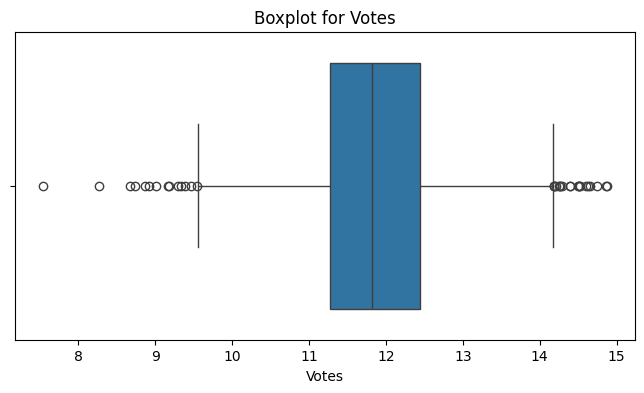

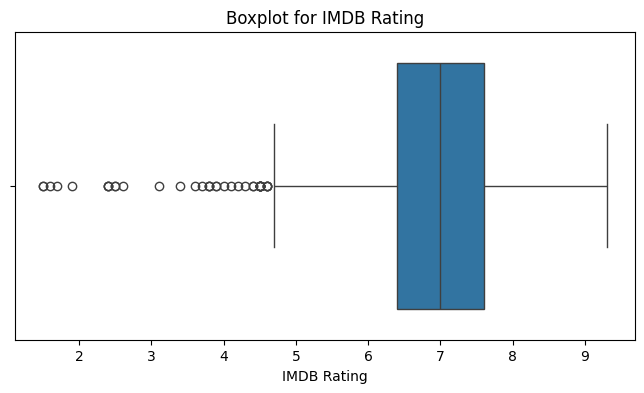

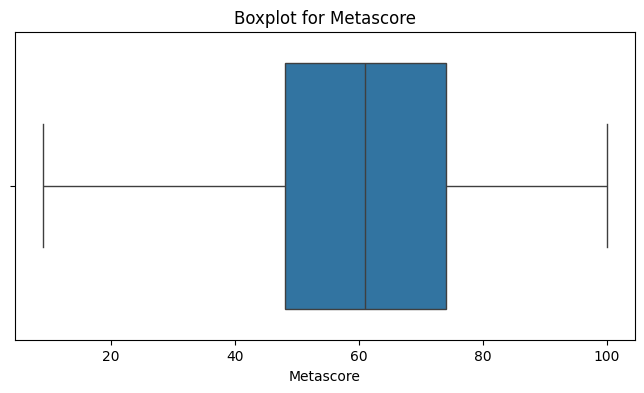

In [15]:
import pandas as pd

# Load the dataset


# Select numeric columns for analysis
numeric_cols = ['Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Gross']

# Detect outliers using IQR method
outliers = {}
for col in numeric_cols:
    Q1 = df_imputed1[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df_imputed1[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers[col] = df_imputed1[(df_imputed1[col] < lower_bound) | (df_imputed1[col] > upper_bound)]

    print(f"Column: {col}")
    print(f"Number of Outliers: {outliers[col].shape[0]}")
    print(outliers[col])
    print()
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Votes
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_imputed1['Votes'])
plt.title('Boxplot for Votes')
plt.show()

# Visualize IMDB Rating
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_imputed1['IMDB Rating'])
plt.title('Boxplot for IMDB Rating')
plt.show()

#visualizing Metascore
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_imputed1['Metascore'])
plt.title('Boxplot for Metascore')
plt.show()


## REMOVING OUTLIERS

In [16]:
# Define function to remove outliers using IQR
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers for Votes and IMDB Rating


df_cleaned = remove_outliers_iqr(df_imputed1, 'Votes')
df_impute1 = remove_outliers_iqr(df_cleaned, 'IMDB Rating')

## DOING ONE-HOT ENCODING

In [17]:
# Split the genres into a list
df_imputed1['Genre_List'] = df_imputed1['Genre'].apply(lambda x: x.split(', '))

# Perform one-hot encoding for the genres
genre_dummies = df_imputed1['Genre_List'].explode().str.get_dummies().groupby(level=0).sum()

# Concatenate the one-hot encoded genres back to the dataset
df_imputed1 = pd.concat([df_imputed1, genre_dummies], axis=1)

# Drop intermediate 'Genre_List' column
df_imputed1.drop(columns=['Genre_List'], inplace=True)

# Display the one-hot encoded columns along with the original Genre column
columns_to_display = ['Genre'] + list(genre_dummies.columns)
df_imputed1[columns_to_display].head()


,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,"Crime, Drama",0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Crime, Drama",0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Drama,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"Adventure, Biography, Drama",0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"Crime, Drama, Thriller",0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


DECISION TREE

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.42872580202406296
Mean Squared Error (MSE): 0.44338944730745483
Root Mean Squared Error (RMSE): 0.6658749487009215
R2 Score: 0.569488862849272


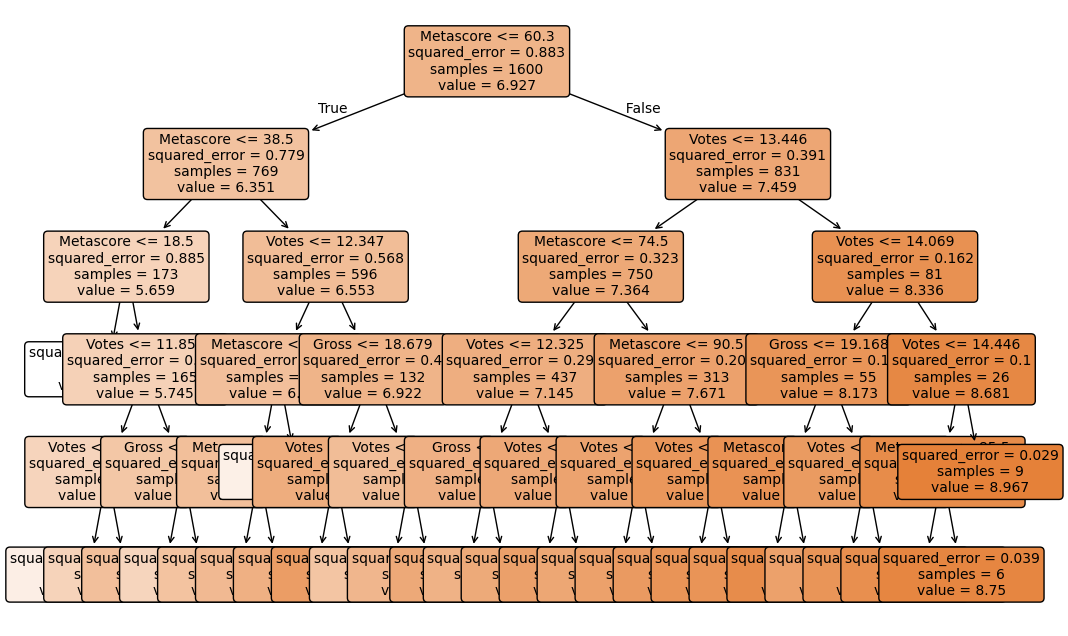

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree



# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10)


# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")


# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()


POLYNOMIAL GRADIENT DESCENT

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 0.4126210110002948
Mean Squared Error (MSE): 0.4309642419350911
Root Mean Squared Error (RMSE): 0.6564786683016373
R2 Score: 0.5815531763476455


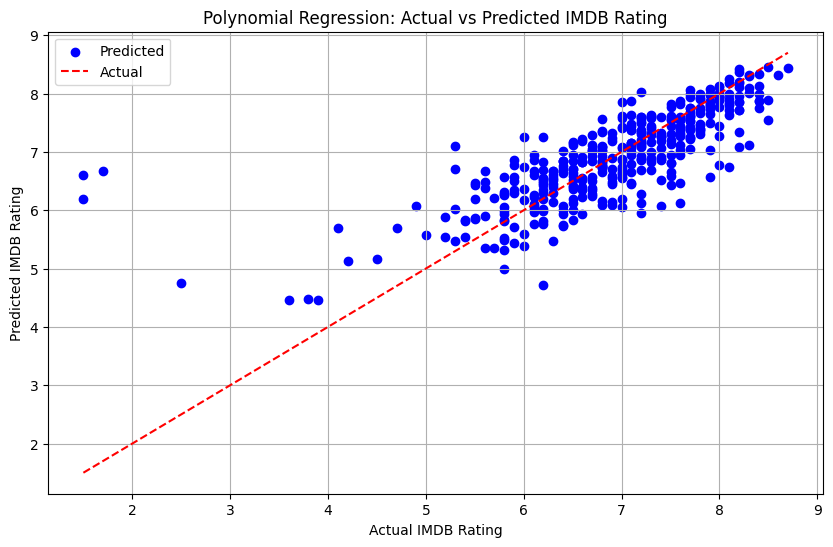

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize PolynomialFeatures (degree=2, but you can experiment with other degrees)
poly = PolynomialFeatures(degree=2)

# Transform the features to include polynomial terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train_poly, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test_poly)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")


# Plotting Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted IMDB ratings
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Polynomial Regression: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()

## Batch Gradient Descent

Mean Absolute Error (MAE): 0.4354009794609163
Mean Squared Error (MSE): 0.4422883832481328
Root Mean Squared Error (RMSE): 0.6650476548700347
R2 Score: 0.5705579463449056


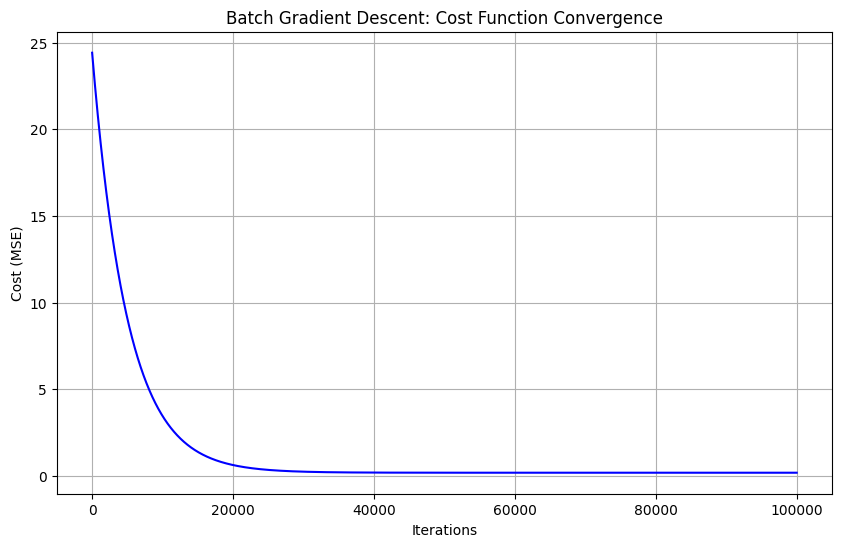

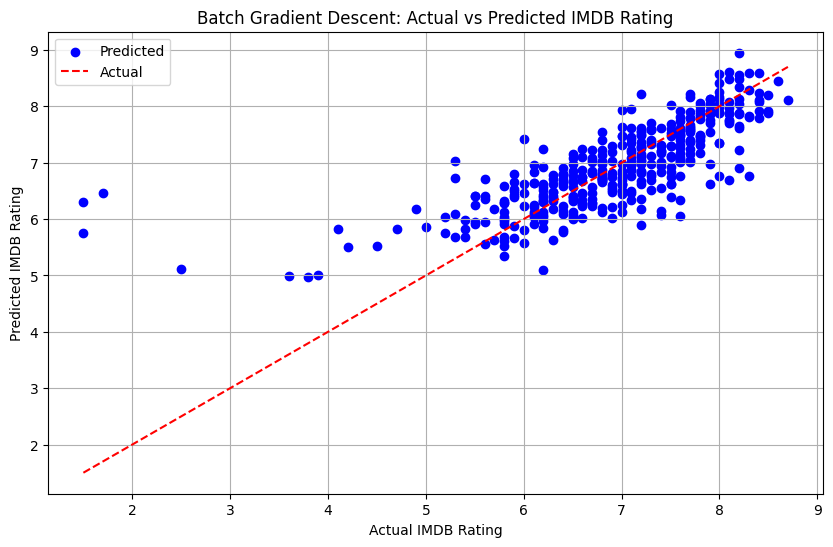

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed1[['Metascore', 'Votes', 'Gross']])

# Add a column of ones to X for the bias term (intercept)
X = np.c_[np.ones(X_scaled.shape[0]), X_scaled]


# Add a column of ones to X for the bias term (intercept)


# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters (theta) for Batch Gradient Descent
theta = np.zeros(X_train.shape[1])  # Start with zero weights

# Hyperparameters
learning_rate = 0.0001
iterations = 100000

# Cost function to calculate Mean Squared Error (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Batch Gradient Descent Algorithm
def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Predictions
        predictions = X.dot(theta)

        # Gradient (derivative of cost function)
        gradients = (1/m) * X.T.dot(predictions - y)

        # Update parameters (theta)
        theta -= learning_rate * gradients

        # Compute and record cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Train the model using BGD
theta_optimal, cost_history = batch_gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Make predictions on the test set
y_pred = X_test.dot(theta_optimal)

# Evaluate the model
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Plotting the convergence of the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Batch Gradient Descent: Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

# Scatter Plot: Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Batch Gradient Descent: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## Stochastic Gradient Descent

Mean Absolute Error (MAE): 0.4358059594604353
Mean Squared Error (MSE): 0.44210053700459895
Root Mean Squared Error (RMSE): 0.6649064122149816
R2 Score: 0.570740336567326


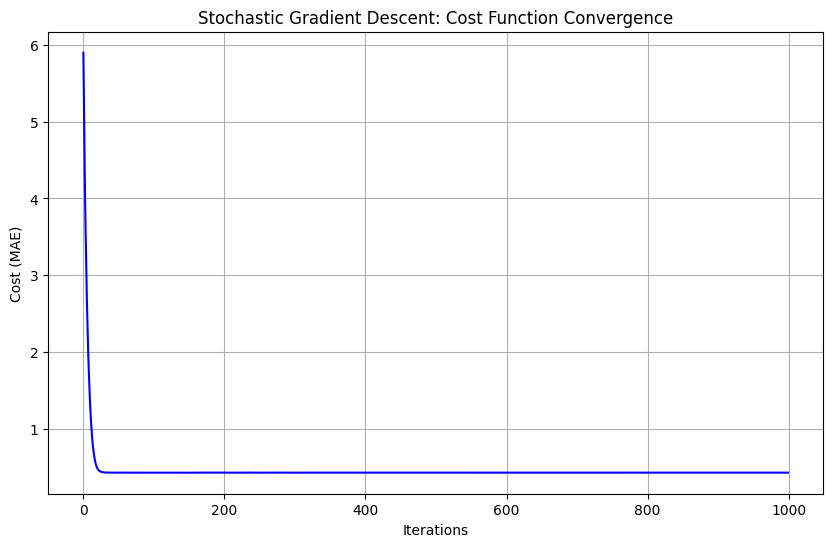

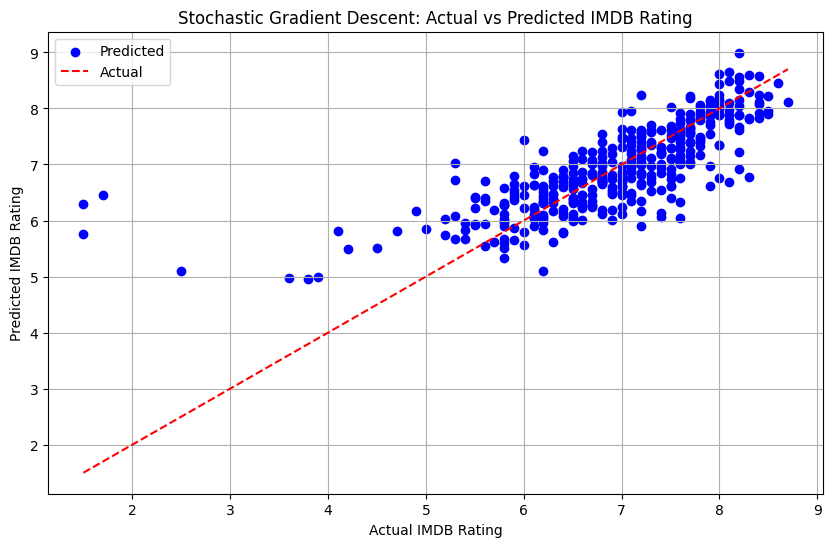

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed1[['Metascore', 'Votes', 'Gross']])

# Add a column of ones to X for the bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X_scaled]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters (theta) for Stochastic Gradient Descent
theta = np.zeros(X_train.shape[1])  # Start with zero weights

# Hyperparameters
learning_rate = 0.0001
iterations = 1000
batch_size = 1  # Single example for stochastic gradient descent

# Cost function to calculate Mean Absolute Error (MAE)
def compute_mae(X, y, theta):
    predictions = X.dot(theta)
    mae = np.mean(np.abs(predictions - y))
    return mae

# Stochastic Gradient Descent Algorithm
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Shuffle the data (important for SGD)
        for j in range(m):
            rand_index = np.random.randint(m)
            xi = X[rand_index:rand_index+1]  # Single sample
            yi = y.iloc[rand_index:rand_index+1]  # Corresponding label

            # Predictions and error for the single data point
            predictions = xi.dot(theta)
            error = predictions - yi

            # Gradient (derivative of cost function)
            gradients = xi.T.dot(error)  # Gradients for the current data point

            # Update parameters (theta)
            theta -= learning_rate * gradients

        # Compute and record MAE
        mae = compute_mae(X, y, theta)
        cost_history.append(mae)

    return theta, cost_history

# Train the model using SGD
theta_optimal, cost_history = stochastic_gradient_descent(X_train, y_train, theta, learning_rate, iterations, batch_size)

# Make predictions on the test set
y_pred = X_test.dot(theta_optimal)

# Evaluate the model
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Plotting the convergence of the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Stochastic Gradient Descent: Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost (MAE)')
plt.grid(True)
plt.show()

# Scatter Plot: Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Stochastic Gradient Descent: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## Minibatch Gradient Descent

Mean Absolute Error (MAE): 0.43995269110158886
Mean Squared Error (MSE): 0.4424664237588995
Root Mean Squared Error (RMSE): 0.6651814968554819
R2 Score: 0.5703850770463363


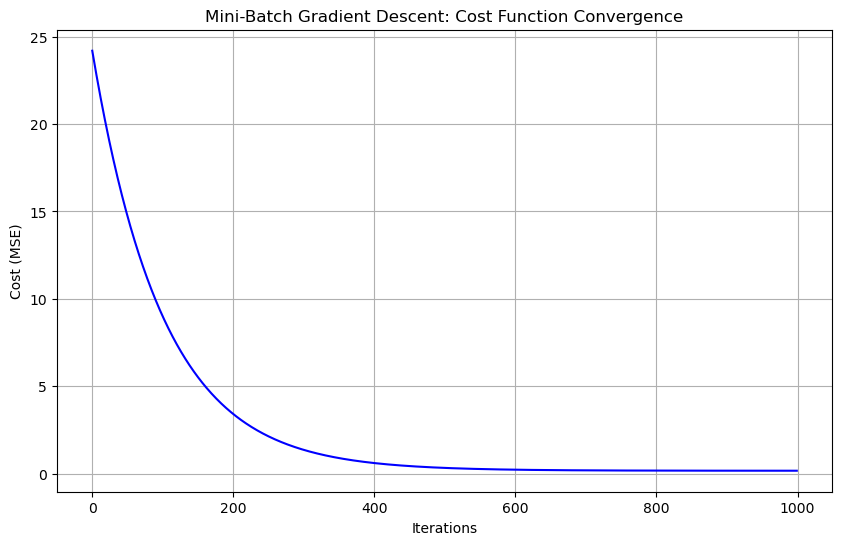

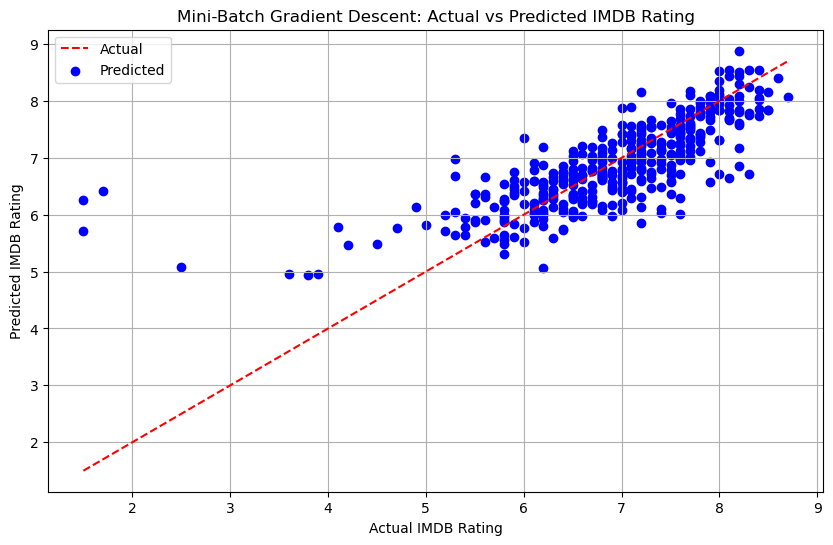

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming your dataset is loaded in df_imputed1

# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed1[['Metascore', 'Votes', 'Gross']])

# Add a column of ones to X for the bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X_scaled]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters (theta) for Mini-Batch Gradient Descent
theta = np.zeros(X_train.shape[1])  # Start with zero weights

# Hyperparameters
learning_rate = 0.0001
iterations = 1000
batch_size = 32  # Mini-batch size

# Cost function to calculate Mean Squared Error (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# Mini-Batch Gradient Descent Algorithm
def mini_batch_gradient_descent(X, y, theta, learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y.iloc[indices]

        for i in range(0, m, batch_size):
            # Create mini-batches
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled.iloc[i:i+batch_size]

            # Predictions and error for the batch
            predictions = X_batch.dot(theta)
            error = predictions - y_batch

            # Gradient (derivative of cost function)
            gradients = (1/len(y_batch)) * X_batch.T.dot(error)

            # Update parameters (theta)
            theta -= learning_rate * gradients

        # Compute and record cost after each iteration
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Train the model using Mini-Batch GD
theta_optimal, cost_history = mini_batch_gradient_descent(X_train, y_train, theta, learning_rate, iterations, batch_size)

# Make predictions on the test set
y_pred = X_test.dot(theta_optimal)

# Evaluate the model
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Plotting the convergence of the cost function
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Mini-Batch Gradient Descent: Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

# Scatter Plot: Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Mini-Batch Gradient Descent: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## SVR

Mean Absolute Error (MAE): 0.41617873803931393
Mean Squared Error (MSE): 0.45746324749453693
Root Mean Squared Error (RMSE): 0.6763602941439842
R2 Score: 0.555823838209271


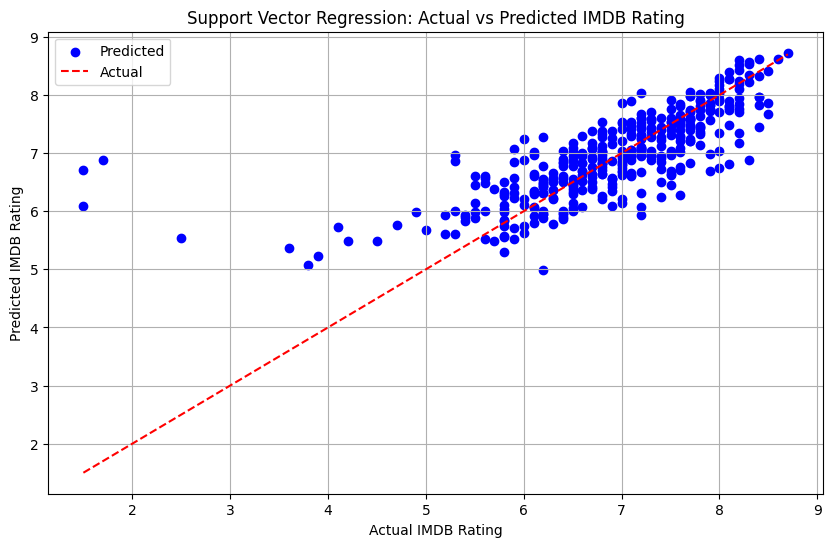

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is important for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()

# Scaling the features and target variable
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1))

# Training the Support Vector Regression (SVR) model
regressor = SVR(kernel='rbf')  # Use Radial Basis Function (RBF) kernel
regressor.fit(X_train_scaled, y_train_scaled.ravel())  # ravel to convert to 1D array

# Predicting the test set results
y_pred_scaled = regressor.predict(sc_X.transform(X_test))  # Scale X_test as well
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Inverse scale to get the actual predictions

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot: Actual vs Predicted IMDB Ratings
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Support Vector Regression: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## Random Forest

Mean Absolute Error (MAE): 0.430685
Mean Squared Error (MSE): 0.47323527000000015
Root Mean Squared Error (RMSE): 0.6879209765663497
R2 Score: 0.5405099163619486


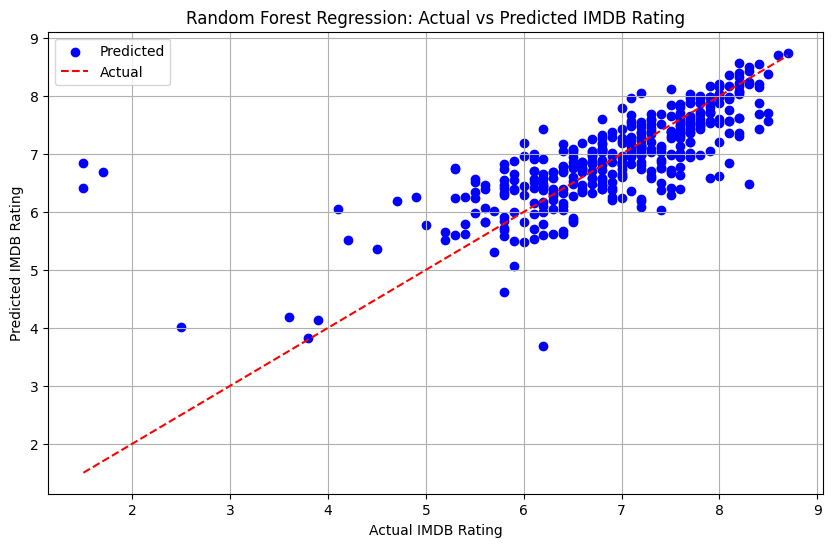

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Scatter plot: Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Random Forest Regression: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## Ridge Regression

Mean Absolute Error (MAE): 0.4353497906441981
Mean Squared Error (MSE): 0.4423111379223127
Root Mean Squared Error (RMSE): 0.6650647622016316
R2 Score: 0.5705358525835044


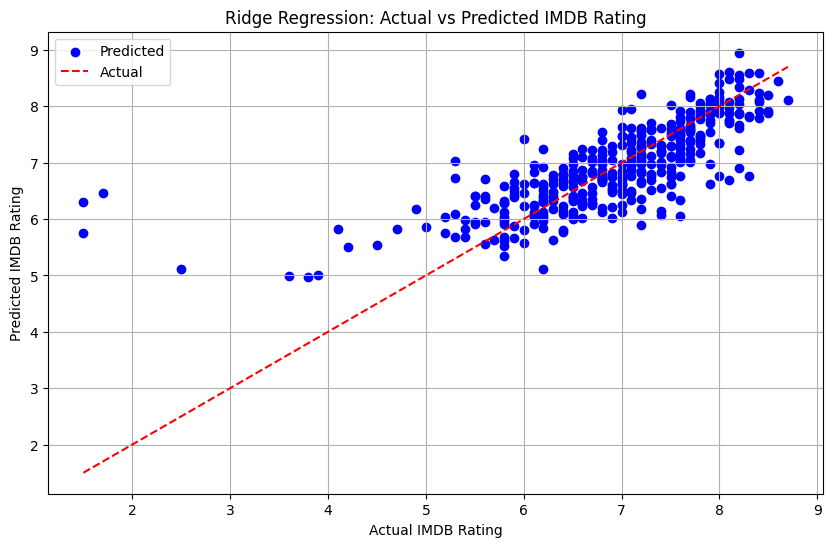

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is important for Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Ridge Regression model
ridge_regressor = Ridge(alpha=1.0, random_state=42)  # alpha is the regularization strength
ridge_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_regressor.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Scatter plot: Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Ridge Regression: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## Lasso Regression

Mean Absolute Error (MAE): 0.44484873416224024
Mean Squared Error (MSE): 0.48823889997454956
Root Mean Squared Error (RMSE): 0.6987409391001429
R2 Score: 0.5259420689741575


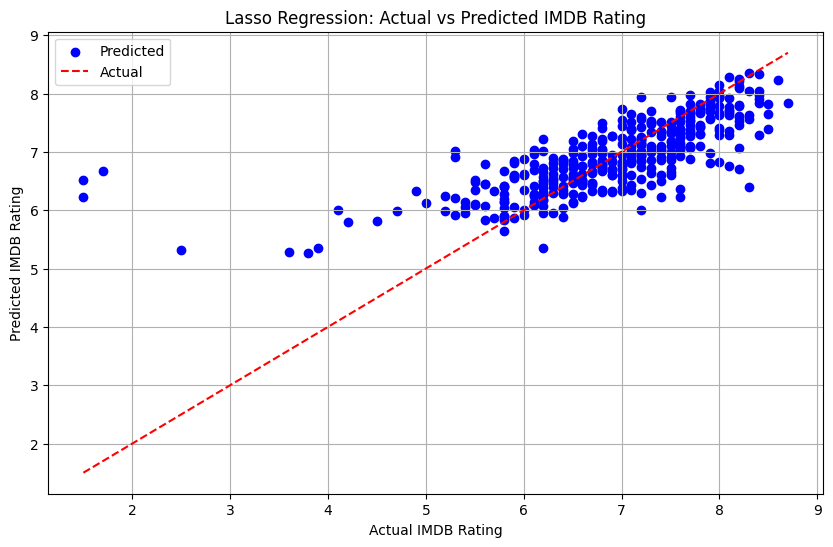

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is important for Lasso Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso Regression model
lasso_regressor = Lasso(alpha=0.1, random_state=42)  # alpha is the regularization strength
lasso_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso_regressor.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Scatter plot: Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Lasso Regression: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## Elastic Net Regularization

Mean Absolute Error (MAE): 0.4339410888095753
Mean Squared Error (MSE): 0.46234763819650754
Root Mean Squared Error (RMSE): 0.6799614975838761
R2 Score: 0.5510813153365159


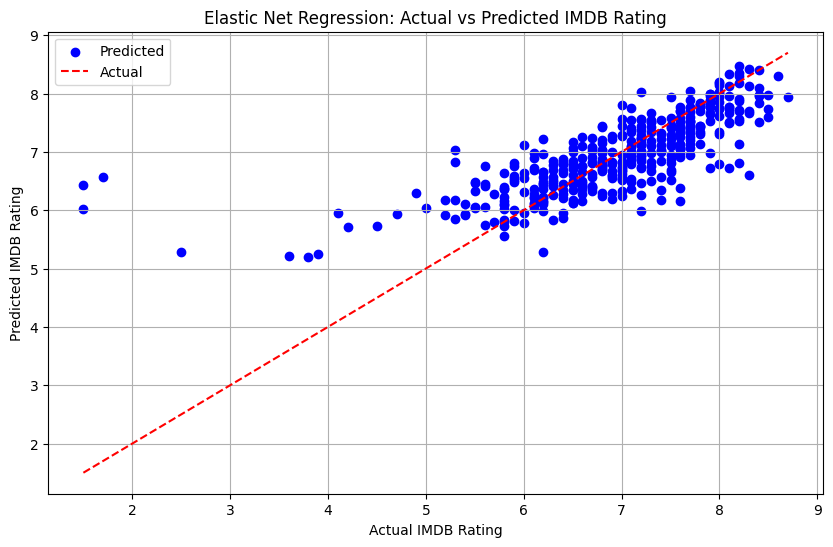

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is important for Elastic Net
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # alpha controls overall strength, l1_ratio controls L1 vs L2
elastic_net.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = elastic_net.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

# Scatter plot: Actual vs Predicted IMDB Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Actual', linestyle='--')

plt.title('Elastic Net Regression: Actual vs Predicted IMDB Rating')
plt.xlabel('Actual IMDB Rating')
plt.ylabel('Predicted IMDB Rating')
plt.legend()
plt.grid(True)
plt.show()


## Early Stopping

Mean Absolute Error (MAE): 0.4324182022276321
Mean Squared Error (MSE): 0.47375372855266684
Root Mean Squared Error (RMSE): 0.6882977034341077
R2 Score: 0.5400065165123817


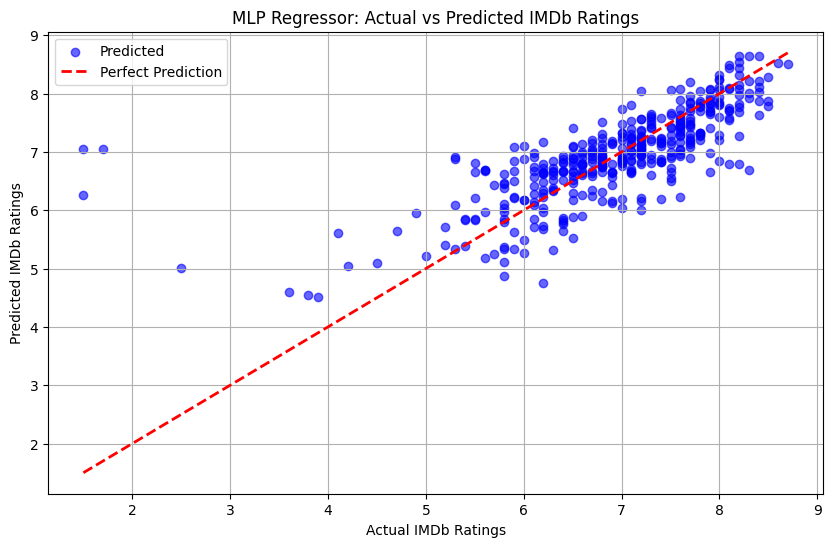

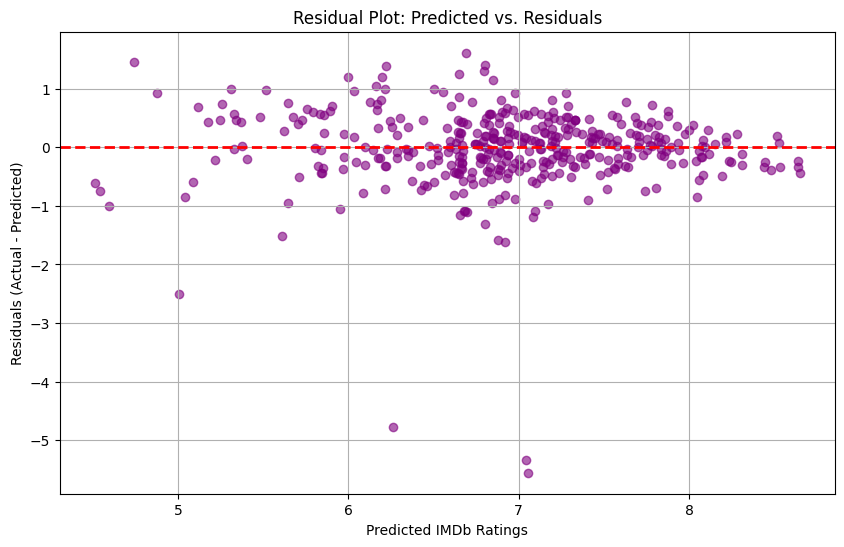

In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling is important for MLP (Multilayer Perceptron)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLP model with early stopping
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000, early_stopping=True,
                   validation_fraction=0.1, n_iter_no_change=10, random_state=42)

mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

import matplotlib.pyplot as plt

# Scatter plot: Actual vs. Predicted IMDb Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('MLP Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()

# Residual plot: Prediction Errors
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot: Predicted vs. Residuals')
plt.xlabel('Predicted IMDb Ratings')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()



#


Linear Regressor R2 Score = 0.5705513192811591
Random Forest Regressor R2 score = 0.5405099163619486
SVR R2 score = 0.5362699692405093
Voting Regressor R2 Score: 0.57
Mean Absolute Error (MAE): 0.42
Mean Squared Error (MSE): 0.44


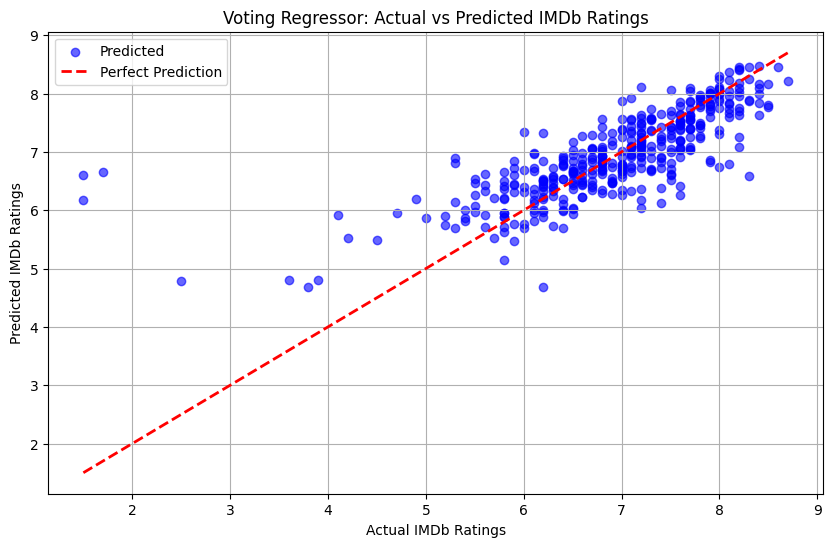

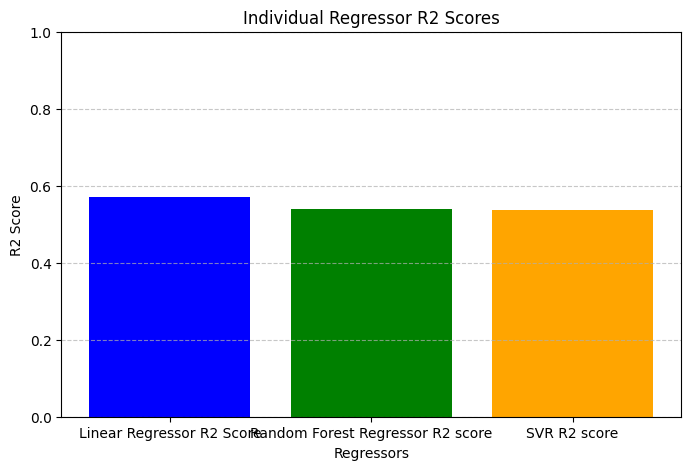

In [29]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract independent and target variables
X = df_imputed1[['Metascore', 'Votes', 'Gross']]  # Independent variables
y = df_imputed1['IMDB Rating']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the regressors
voting_reg = VotingRegressor(
    estimators=[
        ('Linear Regressor R2 Score', LinearRegression()),
        ('Random Forest Regressor R2 score', RandomForestRegressor(random_state=42)),
        ('SVR R2 score', SVR())
    ]
)

# Fit the Voting Regressor to the training data
voting_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = voting_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#printing R2 score for each regressor
for name, regressor in voting_reg.named_estimators_.items():
    print(name, "=", regressor.score(X_test, y_test))

# Print evaluation metrics
print(f"Voting Regressor R2 Score: {r2:.2f}")

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Perfect Prediction')
plt.title('Voting Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()

# Collect individual regressor scores
regressor_scores = {name: regressor.score(X_test, y_test) for name, regressor in voting_reg.named_estimators_.items()}

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(regressor_scores.keys(), regressor_scores.values(), color=['blue', 'green', 'orange'])
plt.title('Individual Regressor R2 Scores')
plt.xlabel('Regressors')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # R2 score ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





#Bagging Regressor using Decision Tree Regressor

Bagging Regressor with SVR as base estimator:
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.44
R2 Score: 0.58


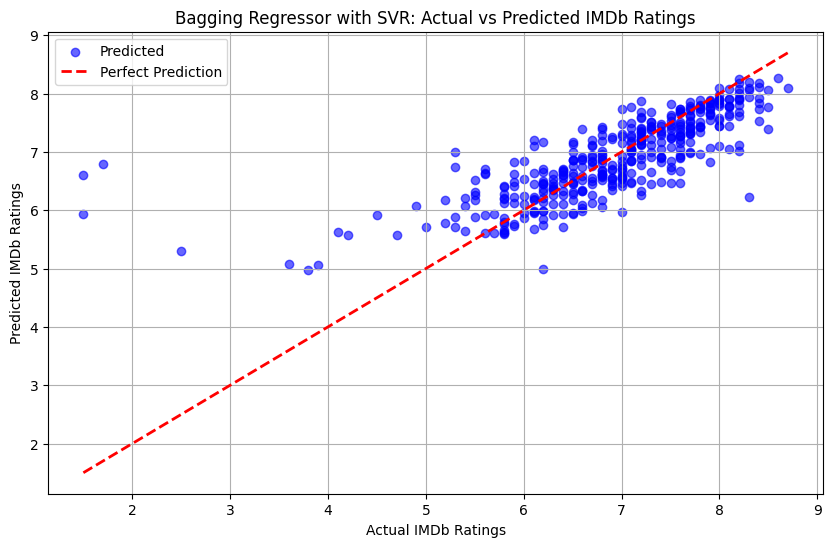

In [35]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
genre_columns = [col for col in df_imputed1.columns if col not in ['IMDB Rating', 'Votes', 'Gross', 'Metascore']]  # Adjust as needed
X = df_imputed1[['Metascore', 'Votes', 'Gross'] + genre_columns]
y = df_imputed1['IMDB Rating']  # Target variable
# Ensure X contains only numeric columns
X = X.select_dtypes(include=[np.number])


bag_regressor=BaggingRegressor(DecisionTreeRegressor(),n_estimators=500, max_samples=80, n_jobs=-1,random_state=42)
bag_regressor.fit(X_train, y_train)
y_pred=bag_regressor.predict(X_test)
# Evaluate the Bagging Regressor
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Bagging Regressor with SVR as base estimator:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")
# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Bagging Regressor with SVR: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()

## Gradient Boosting Regressor

Cross-Validation R2 Scores: [-0.11713439  0.61404733  0.6174617   0.70137276  0.49887377]
Mean R2: 0.46, Std Dev: 0.30

Gradient Boosting Regressor (Test Set):
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.40
R2 Score: 0.61


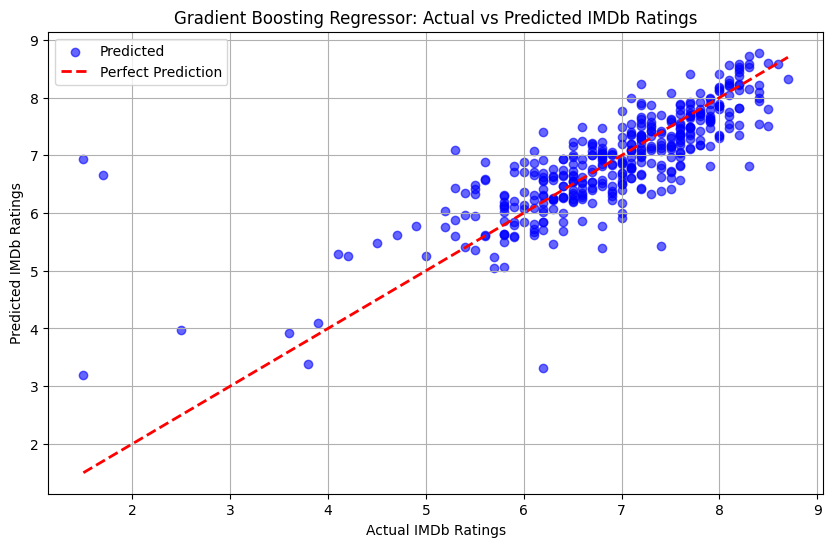

In [33]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

# Define your dataset (assuming df_imputed1 is preprocessed)
genre_columns = [col for col in df_imputed1.columns if col not in ['IMDB Rating', 'Votes', 'Gross', 'Metascore']]
X = df_imputed1[['Metascore', 'Votes', 'Gross'] + genre_columns]
y = df_imputed1['IMDB Rating']

# Ensure X contains only numeric columns
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor with a fixed random state
boosting_regressor = GradientBoostingRegressor(n_estimators=500, max_depth=4, random_state=42)

# Perform cross-validation to get robust R2 scores
cv_scores = cross_val_score(boosting_regressor, X, y, cv=5, scoring='r2')

print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean R2: {cv_scores.mean():.2f}, Std Dev: {cv_scores.std():.2f}")

# Fit the model on the training set
boosting_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = boosting_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nGradient Boosting Regressor (Test Set):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Gradient Boosting Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()


## Stacking Regressor

Stacking Regressor:
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.36
R2 Score: 0.65


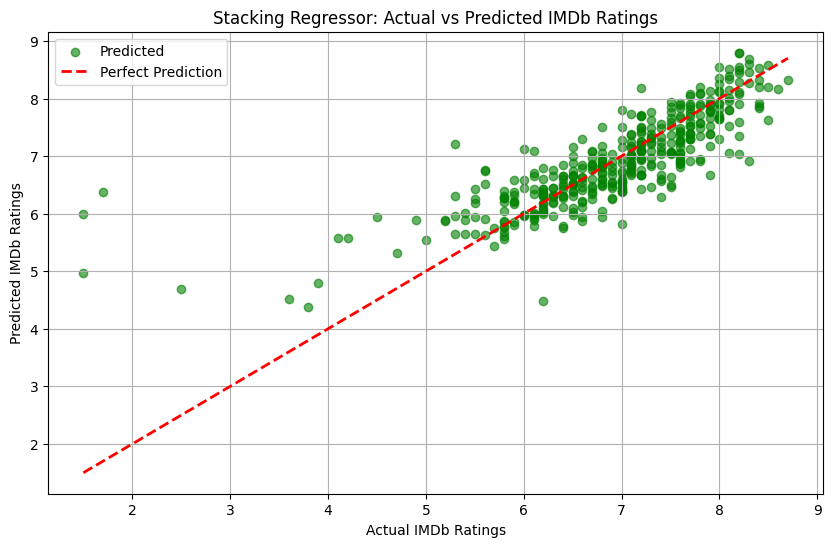

In [36]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
genre_columns = [col for col in df_imputed1.columns if col not in ['IMDB Rating', 'Votes', 'Gross', 'Metascore']]  # Adjust as needed
X = df_imputed1[['Metascore', 'Votes', 'Gross'] + genre_columns]
y = df_imputed1['IMDB Rating']  # Target variable
# Ensure X contains only numeric columns
X = X.select_dtypes(include=[np.number])


# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42)),
    ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
]

# Define the meta-model
meta_model = Ridge(alpha=1.0)

# Create a Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Fit the stacking regressor
stacking_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_stack = stacking_regressor.predict(X_test)

# Evaluate the model
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print evaluation metrics
print("Stacking Regressor:")
print(f"Mean Absolute Error (MAE): {mae_stack:.2f}")
print(f"Mean Squared Error (MSE): {mse_stack:.2f}")
print(f"R2 Score: {r2_stack:.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack, color='green', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Stacking Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()


## Complete Pipeline Stacking  Evaluating Regressor

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ensure consistent results
random_state = 42

# Assuming df_imputed1 is your dataset
# Identify categorical columns (if necessary)
genre_columns = [col for col in df_imputed1.columns if col not in ['IMDB Rating', 'Votes', 'Gross', 'Metascore']]

# One-hot encode genre columns if necessary
df_imputed1 = pd.get_dummies(df_imputed1, columns=genre_columns, drop_first=True)

# Define features (X) and target (y)
X = df_imputed1[['Metascore', 'Votes', 'Gross'] + [col for col in df_imputed1.columns if col.startswith(tuple(genre_columns))]]
y = df_imputed1['IMDB Rating']

# Ensure X contains only numeric columns
X = X.select_dtypes(include=[np.number])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
base_learners = [
    ('ridge', Ridge(alpha=1.0, random_state=random_state)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=random_state)),
    ('svr', SVR(kernel='rbf', C=1.0))
]

# Define meta-model
meta_model = GradientBoostingRegressor(random_state=random_state)

# Create stacking regressor
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

# Hyperparameter tuning
param_grid = {
    'final_estimator__n_estimators': [50, 100, 200],
    'final_estimator__learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(stacking_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Stacking Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()

# Cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean R2: {cv_scores.mean():.2f}, Std Dev: {cv_scores.std():.2f}")


Best Parameters: {'final_estimator__learning_rate': 0.1, 'final_estimator__n_estimators': 50}
Mean Squared Error: 0.44725325456855386
R-squared: 0.5657372804248182


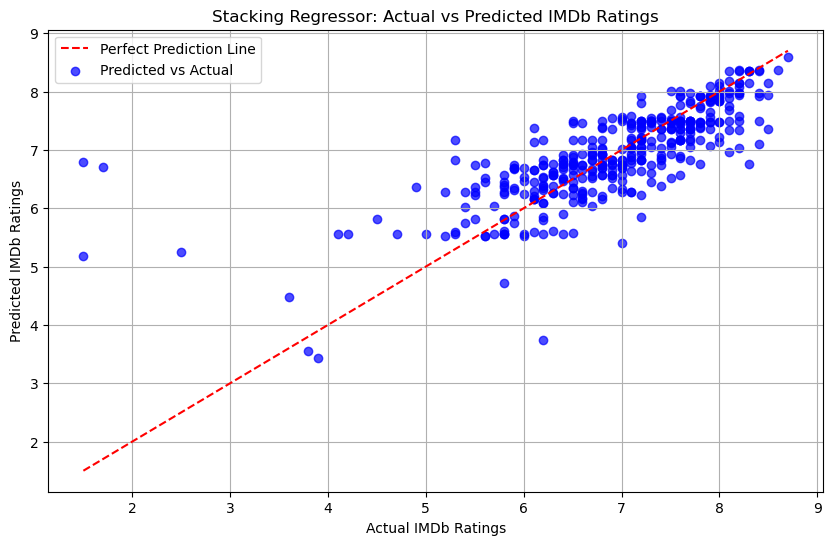

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define base learners
base_learners = [
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(C=1.0, kernel='rbf'))
]

# Define meta-model
meta_model = GradientBoostingRegressor(random_state=42)

# Create stacking regressor
stacking_regressor = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

# Perform grid search for hyperparameter tuning
param_grid = {
    'final_estimator__n_estimators': [50, 100, 200],
    'final_estimator__learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(stacking_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Stacking Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()


Gradient Boosting Regressor with Stratified K-Fold Cross-Validation:
Mean Absolute Error (MAE): 0.42
Mean Squared Error (MSE): 0.38
R2 Score (Test Set): 0.60
Cross-Validation R2 Scores: [0.5169812201522741, 0.46618545838607217, 0.5625860078865135, 0.622627671378039, 0.5385134205061421]
Mean R2: 0.54, Std Dev: 0.05


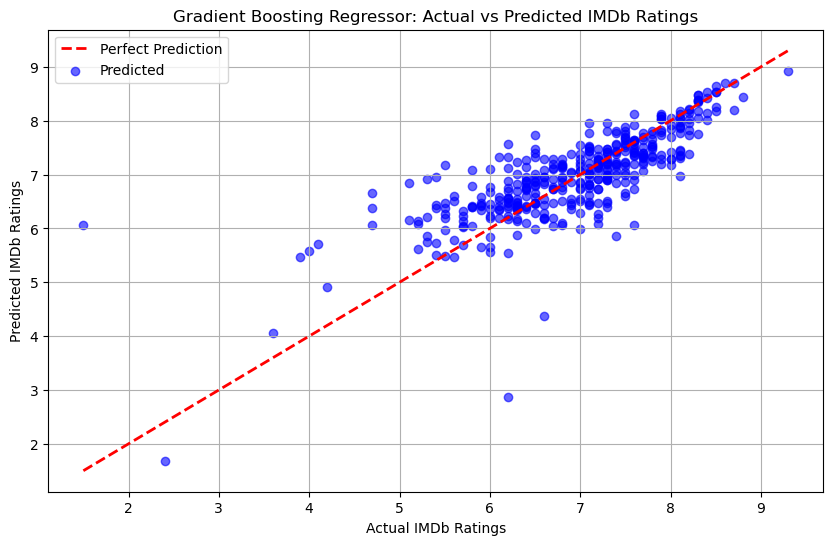

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt




# Ensure X contains only numeric columns
X = X.select_dtypes(include=[np.number])

# Bin the target variable for stratification
y_bins = pd.cut(y, bins=5, labels=False)  # Bin IMDb Ratings into 5 categories for stratification

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_bins)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize Gradient Boosting Regressor
boosting_regressor = GradientBoostingRegressor(n_estimators=500, max_depth=4, random_state=42)

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_idx, val_idx in skf.split(X_train_poly, pd.cut(y_train, bins=5, labels=False)):
    X_fold_train, X_fold_val = X_train_poly[train_idx], X_train_poly[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    boosting_regressor.fit(X_fold_train, y_fold_train)
    cv_scores.append(boosting_regressor.score(X_fold_val, y_fold_val))

# Fit the Gradient Boosting Regressor on the full training set
boosting_regressor.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = boosting_regressor.predict(X_test_poly)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Regressor with Stratified K-Fold Cross-Validation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score (Test Set): {r2:.2f}")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean R2: {np.mean(cv_scores):.2f}, Std Dev: {np.std(cv_scores):.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Gradient Boosting Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()


Stacking Regressor:
Mean Absolute Error (MAE): 0.40
Mean Squared Error (MSE): 0.34
R2 Score (Test Set): 0.64
Cross-Validation R2 Scores: [0.55386409 0.5597956  0.52622915 0.65291067 0.64680196]
Mean R2: 0.59, Std Dev: 0.05


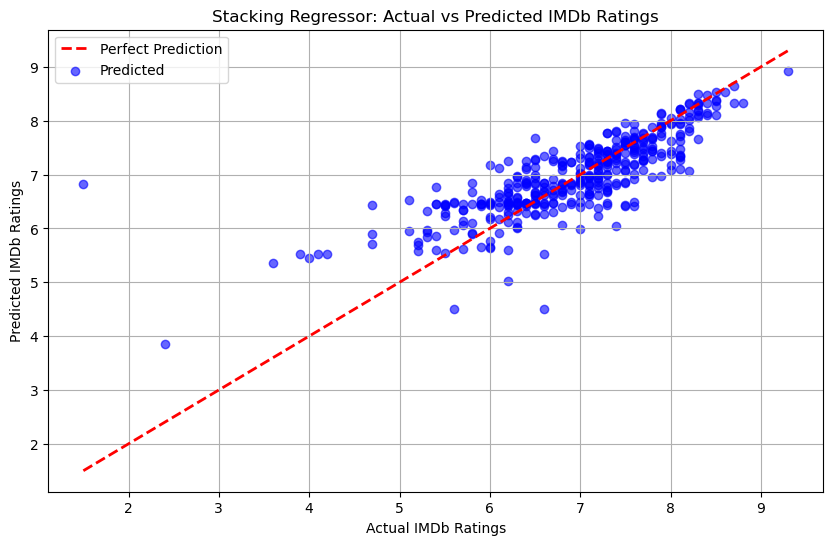

In [ ]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the polynomial transformer for base models
poly_transform = PolynomialFeatures(degree=2, include_bias=False)

# Base models
base_models = [
    ('elastic_net', Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
    ])),
    ('svr', Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
    ])),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=300, max_depth=4, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42))
]

# Meta-model
meta_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)

# Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Fit the stacking regressor
stacking_regressor.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_stack = stacking_regressor.predict(X_test_poly)

# Evaluate the model
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Print evaluation metrics
print("Stacking Regressor:")
print(f"Mean Absolute Error (MAE): {mae_stack:.2f}")
print(f"Mean Squared Error (MSE): {mse_stack:.2f}")
print(f"R2 Score (Test Set): {r2_stack:.2f}")

# Cross-validation for Stacking Regressor
from sklearn.model_selection import cross_val_score

cv_scores_stack = cross_val_score(stacking_regressor, X_train_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores_stack}")
print(f"Mean R2: {cv_scores_stack.mean():.2f}, Std Dev: {cv_scores_stack.std():.2f}")

# Visualize Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Stacking Regressor: Actual vs Predicted IMDb Ratings')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.legend()
plt.grid(True)
plt.show()


Stacking Regressor:
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.31
R2 Score (Test Set): 0.67


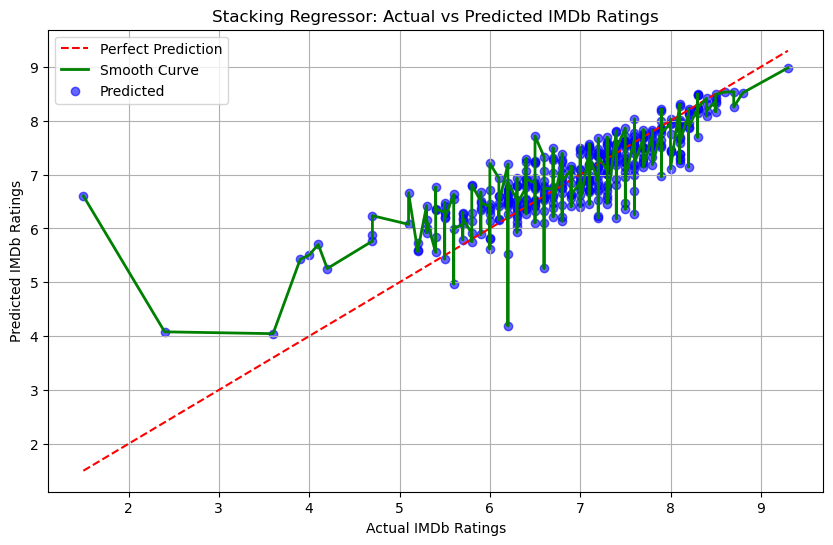

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor

# Base models
base_models = [
    ('elastic_net', Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
    ])),
    ('svr', Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf', C=100, gamma=0.1))
    ])),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=300, max_depth=4, random_state=42)),
    ('random_forest', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42))
]

# Meta-model
meta_model = Ridge(alpha=1.0)

# Define the Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, passthrough=True)

# Fit the Stacking Regressor
stacking_regressor.fit(X_train_poly, y_train)

# Predictions
y_pred_stack = stacking_regressor.predict(X_test_poly)

# Evaluation Metrics
mae_stack = mean_absolute_error(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

# Display metrics
print("Stacking Regressor:")
print(f"Mean Absolute Error (MAE): {mae_stack:.2f}")
print(f"Mean Squared Error (MSE): {mse_stack:.2f}")
print(f"R2 Score (Test Set): {r2_stack:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_stack, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')
plt.title('Stacking Regressor: Actual vs Predicted IMDb Ratings')
plt.legend()
plt.grid(True)

# Add a smooth curve for actual vs predicted
sorted_indices = y_test.argsort()
sorted_y_test = y_test.iloc[sorted_indices]
sorted_y_pred = y_pred_stack[sorted_indices]

plt.plot(sorted_y_test, sorted_y_pred, color='green', lw=2, label='Smooth Curve')
plt.legend()
plt.show()
